<a href="https://colab.research.google.com/github/Malikumair786/Machine_Learning/blob/main/project11_Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workflow:

insurance cost data --> data Analysis --> Ddata preprocessing --> train test split --> Linear Regression model --> Trained Linear Regression model --> New data --> Cost

Importing the dependencies

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [65]:
#loading the dataset from csv file to a pandas dataframe
ins_data = pd.read_csv('/content/insurance.csv')

In [66]:
#first five rows of the dataframe
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
#no of rows and columns
ins_data.shape

(1338, 7)

In [68]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical feature:
1. sex
2. Smoker
3. Region

In [69]:
#checking themissing values
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [70]:
ins_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


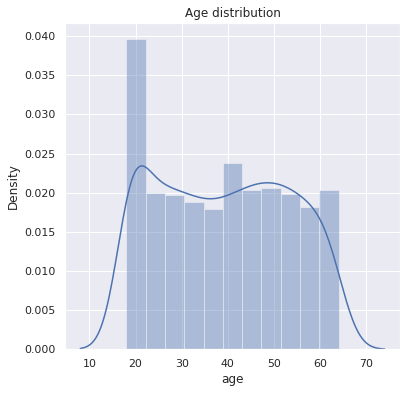

In [71]:
#Distribution of age values
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(ins_data['age'])
plt.title("Age distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


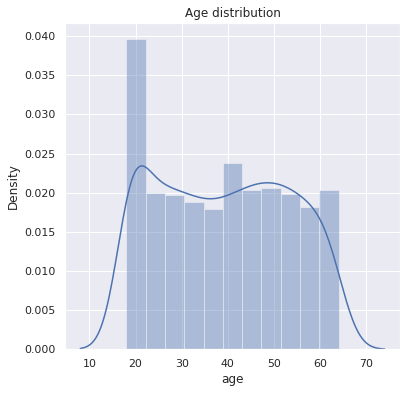

In [72]:
#Distribution of age values
#sns.set()
plt.figure(figsize = (6,6))
sns.distplot(ins_data['age'])
plt.title("Age distribution")
plt.show()

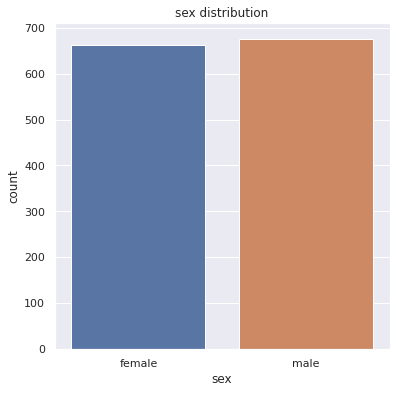

In [73]:
#we use the count plot for categorical features
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex', data = ins_data)
plt.title('sex distribution')
plt.show()

In [74]:
ins_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


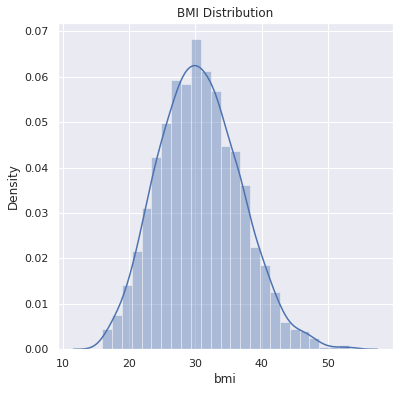

In [75]:
#bmi distribution
plt.figure(figsize = (6,6))
sns.distplot(ins_data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range --> 18.5 to 24.9

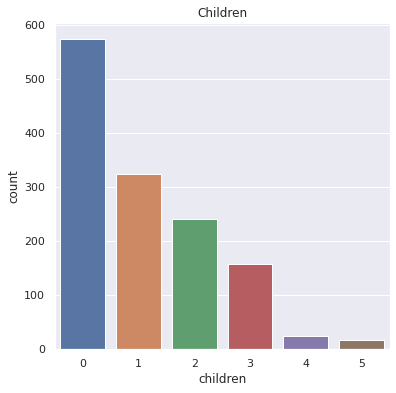

In [76]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = ins_data)
plt.title('Children')
plt.show()

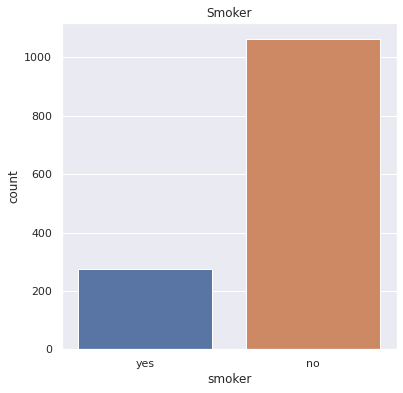

In [77]:
#Smoker

plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = ins_data)
plt.title("Smoker")
plt.show()

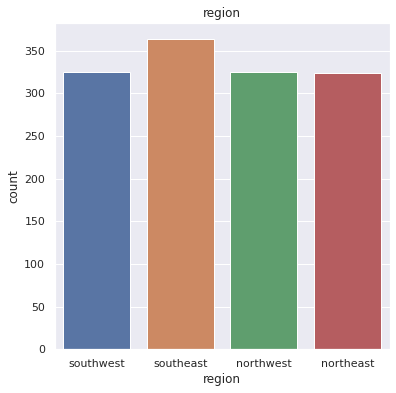

In [78]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = ins_data)
plt.title("region")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


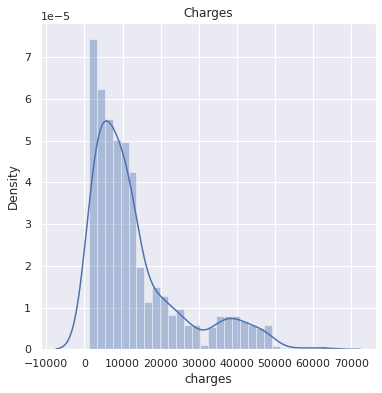

In [79]:
plt.figure(figsize = (6,6))
sns.distplot(ins_data['charges'])
plt.title('Charges')
plt.show()

Data Preprocessing

In [80]:
#Encoding the categorical features
ins_data.replace({'sex' :{'female': 1, 'male':0},
                             'smoker': {'yes': 0, 'no': 1},
                             'region': {'southwest': 1, 'southeast': 2,
                                        'northwest': 3, 'northeast':4},
                             
                             },inplace = True)

In [81]:
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,2,1725.55230
2,28,0,33.000,3,1,2,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the featuers and target

In [82]:
X = ins_data.drop(columns = 'charges', axis = 1)
Y = ins_data['charges']

In [83]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       2
2      28    0  33.000         3       1       2
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       4
1335   18    1  36.850         0       1       2
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [84]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [85]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [86]:
model = LinearRegression()

In [87]:
model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [88]:
#prediction on training data
X_train_prediction = model.predict(X_train)

In [89]:
#R squared value
r2_train = metrics.r2_score(Y_train,X_train_prediction)
print("R squared value: ",r2_train)

R squared value:  0.7519923667088932


In [90]:
#prediction on test data
X_test_prediction = model.predict(X_test)

In [91]:
#R squared value
r2_test = metrics.r2_score(Y_test,X_test_prediction)
print("R squared value: ",r2_test)

R squared value:  0.7445422986536503


Building a predictive system

In [100]:
input_data = (31,1,25.74,0,1,2)

#changing the input_data to numpy array
input_data_numpy_array = np.asarray(input_data)

#Reshaping the array
input_data_reshape = input_data_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)

print(prediction)

[3911.4481614]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [101]:
#46,female,33.44,1,no,southeast
#37,female,27.74,3,no,northwest
input_data = (37,1,27.74,3,1,3)

#changing the input_data to numpy array
input_data_numpy_array = np.asarray(input_data)

#Reshaping the array
input_data_reshape = input_data_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)

print(prediction)

print("The insurance cost is USD ",prediction[0])

[8171.97567366]
The insurance cost is USD  8171.975673656987


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
